# Questions for Prof
- Is google drive/colab submission accpetable
- We have our own dataset validation do we still need the one from orginal code
 - One Seth created is much cooler than the other one -Seth

# Data collection

- Python Program generates a PDF file with a 10x10 grid
  - Code given on canvas



In [ ]:
!pip install reportlab
#####
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Define paper size
paper_width, paper_height = letter
# Define the grid size (10x10)
grid_size = 10
# Calculate the size of the squares based on the width to ensure perfect squares
square_size = paper_width / grid_size
# Calculate the vertical spacing to center the squares vertically
vertical_spacing = (paper_height - (square_size * grid_size)) / 2
# Create the PDF file
pdf_path_squares_corrected5 = 'perfect_squares_corrected5.pdf'
c = canvas.Canvas(pdf_path_squares_corrected5, pagesize=letter)
# Draw the 10x10 grid of perfect squares
for row in range(grid_size):
    for col in range(grid_size):
        x = col * square_size
        y = paper_height - (vertical_spacing + row * square_size + square_size)
        c.rect(x, y, square_size, square_size, stroke=1, fill=0)

# Save the PDF
c.save()
print("PDF file generated successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.4 MB/s eta 0:00:00
PDF file generated successfully!


# Data retrieval

## Creating sorted images

- Prompt for chatGPT
  - Write a Python program to do the following. Assume that the input is a folder called input with 10 files insides of it each is an image file is called image.jpeg, image2.jpeg, so on in the same pattern until image10.jpeg. Each file within the input folder is a perfect square. Divide its content into perfect 10 X 10 squares. Place each row of this divided image into it's own folder do this for every image within input. All of the squares in row 1 should be put in a folder called 0, all files in row 2 should be put in a folder called 1, this pattern should continue for each row for the remaining 8 folders being in order 7,8,9,l,m,k,p,n. Make sure the folders are named in accordance with this pattern(0,1,7,8,9,l,m,k,p,n) in order with each row. All of these output folders should be inside of a folder called ndnmol. In short for each image file within the input folder make a 10 by 10 square and put each row of the square in the corresponding folder(0,1,7,8,9,l,m,k,p,n).


In [ ]:
#allows google colab to see files in drive which is needed for shared drives files to run in colab

from google.colab import drive
drive.mount('/content/drive', readonly=True)

Mounted at /content/drive


In [ ]:
#code created by chatGPT
import os
from PIL import Image

# Create the output directory if it doesn't exist
output_dir = "sorted_images"
os.makedirs(output_dir, exist_ok=True)

# Define the folder names for each row
row_folders = ["0", "1", "7", "8", "9", "l", "m", "k", "p", "n"]
counter = 1;

# Iterate over each image file in the "input" directory
input_dir = "/content/drive/Shareddrives/input_images"
for filename in os.listdir(input_dir):
    if filename.endswith(".jpeg"):
        input_path = os.path.join(input_dir, filename)

        # Open the image using Pillow
        image = Image.open(input_path)

        # Get the dimensions of the image
        width, height = image.size

        # Calculate the size of each small square (assuming perfect square)
        square_size = width // 10

        # Create folders for each row
        for folder_name in row_folders:
            row_folder = os.path.join(output_dir, folder_name)
            os.makedirs(row_folder, exist_ok=True)

        # Divide the image into 10x10 squares and place each row in the corresponding folder
        for i in range(10):
            for j in range(10):
                # Crop a square from the image
                left = j * square_size
                upper = i * square_size
                right = left + square_size
                lower = upper + square_size

                square = image.crop((left, upper, right, lower))

                # Determine the folder for this row and save the square there
                row_index = i
                row_folder = os.path.join(output_dir, row_folders[row_index])
                square.save(os.path.join(row_folder, f"{counter}.png"))
                counter += 1

print("Image processing complete.")

Image processing complete.


## Validation on sorted data
- Checks if folders contain expected amount of image files
- Checks if data is in correct folder

In [ ]:
#validating ML dataset has number of items we expect

input_dir = "/content/sorted_images/" #directory of our 1,000 images

counter = 0
error = False

#runs through each folder and checks that each class folder has 100 images
for folder in os.listdir(input_dir):
  for filename in os.listdir(f"{input_dir}{folder}"):
    if filename.endswith(".png"):
      counter += 1
    else:
      print(f"Warning: File {folder}/{filename} is not an image file")
  if counter != 100:
    print(f"Error in Folder: {folder}, expect 100 images but got:{counter}")
    error = True
  counter = 0

#checks if files are in correct folders
#since each file named sequentially and each image of the class is from the same row we can use clever arthemtic to validate files

#Dict contains min and max values of file numbers for the tens place
#in other words the "row" for the image file
folder_number_key = {
    "0" : [1,10],
    "1" : [11,20],
    "7" : [21,30],
    "8" : [31,40],
    "9" : [41,50],
    "k" : [71,80],
    "l" : [51,60],
    "m" : [61,70],
    "n" : [91,100], #extra logic needed since files end in 00 such as 1000.png or 500.png
    "p" : [81,90],
}

for folder in os.listdir(input_dir):
  expected_filenumber_range = folder_number_key.get(folder)
  for filename in os.listdir(f"{input_dir}{folder}"):
    if filename.endswith(".png"):
      filename_number = int(filename.split('.')[0]) #keeps only parts of filename before . and turns string into an int
    #checks if file number mod 100(gets rid of 100s place) is in expected range
    if filename_number%100 < expected_filenumber_range[0] or filename_number%100 > expected_filenumber_range[1]:
      #some files in n directory are multiples of 100 so an extra check is needed
      if (folder == "n" and filename_number%100 == 0) == False:
        print(f"Error: Dataset contains file in wrong folder at: {input_dir}{folder}/{filename}")
        error = True

if error == False:
  print("Dataset has all 1,000 images and images are in expected location")


Dataset has all 1,000 images and images are in expected location


# Dataset creation

## Training and test set creation/seperation
- Creates appropriate directories(ndnmol and ndnmol_test_set
- Takes all files from sorted images directory and adds it to ndnmol
  - Uses random.sample to generate 20 random files from class folder
  - Moves randomly selected files to test set

In [ ]:
import random
import shutil
class_dirs = ['0','1','7','8','9','k','l','m','n','p']

#create target directories ndnmol and ndnmol_test_set and set variables to remember location
os.mkdir("ndnmol")
ndnmol_dir = "/content/ndnmol/"

os.mkdir("ndnmol_test_set")
ndnmol_test_dir = "/content/ndnmol_test_set/"

source_dir = "/content/sorted_images/"

#creates class folders in training and test set
for dirs in class_dirs:
  os.mkdir(f"ndnmol/{dirs}")
  os.mkdir(f"ndnmol_test_set/{dirs}")
print("Created training and test folders")

#moves files from orginal dataset to our test/train dataset
for folder in os.listdir(source_dir):
  #randomly selects 20 files to move to test set
  random_files = random.sample(os.listdir(f"{source_dir}{folder}"),20)
  for filename in os.listdir(f"{source_dir}{folder}"):
    #copys all files in class directory from orginal data to new training set
    shutil.copy(f"{source_dir}{folder}/{filename}",f"{ndnmol_dir}{folder}/{filename}")
  for filename in random_files:
    #moves randomly selected files to test set
    shutil.move(f"{ndnmol_dir}{folder}/{filename}",f"{ndnmol_test_dir}{folder}/{filename}")
print("Moved data to training and test folders")

Created training and test folders
Moved data to training and test folders


## Dataset validation

- Removes any file that is not a .png file from dataset
    - Google colab adds .ipynb_chechkpoints to folder? unsure if this causes errors in model
- Checks if number of files in each class folder is as expected(80 in training set, 20 in test set)
- Checks if there are any files in both the training and test set
- Checks if any files from orginal data is missing from dataset

In [ ]:
#Seth's dataset validation

import shutil
error = False
#Colab automatically adds .ipynb_checkpoints to file more researched needed on these file types

#removes any file is not a .png in training set and folders that are .ipynb
training_dir = "/content/ndnmol/"
test_dir = "/content/ndnmol_test_set/"

for folder in os.listdir(training_dir):
  if folder.endswith(".ipynb_checkpoints"):
    shutil.rmtree(f"{training_dir}{folder}")
    print(f"Removed folder: {training_dir}{folder}")
  else:
    for filename in os.listdir(f"{training_dir}{folder}"):
      if not filename.endswith(".png"):
        print(f"remove file in folder:{folder}: {training_dir}{folder}/{filename}")
        shutil.rmtree(f"{training_dir}{folder}/{filename}")

#removes any file is not a .png in test set and folders that are .ipynb

for folder in os.listdir(test_dir):
  if folder.endswith(".ipynb_checkpoints"):
    shutil.rmtree(f"{test_dir}{folder}")
    print(f"Removed folder: {training_dir}{folder}")
  else:
    for filename in os.listdir(f"{test_dir}{folder}"):
      if not filename.endswith(".png"):
        print(f"remove file in folder:{folder}: {test_dir}{folder}/{filename}")
        shutil.rmtree(f"{test_dir}{folder}/{filename}")


#counts number of files in training/test set
counter = 0
for folder in os.listdir(training_dir):
  for filename in os.listdir(f"{training_dir}{folder}"):
    if filename.endswith(".png"):
      counter += 1
    else:
      print(f"\nWarning: not an image file {training_dir}{folder}/{filename}")
  if counter != 80:
    print(f"\nERROR in training set: expected 80 files in folder:{folder} but got:{counter}")
    error = True
  counter = 0

for folder in os.listdir(test_dir):
  for filename in os.listdir(f"{test_dir}{folder}"):
    if filename.endswith(".png"):
      counter += 1
    else:
      print(f"\nWarning: not an image file {test_dir}{folder}/{filename}")
  if counter != 20:
    print(f"\nERROR in test set: expected 20 files in folder:{folder} but got: {counter}")
    error = True
  counter = 0

#checks for overlapping files in training and test set
for folder in os.listdir(test_dir):
  for filename in os.listdir(f"{test_dir}{folder}"):
    if filename in os.listdir(f"{training_dir}{folder}"):
      print(f"\nERROR repeated files in training and test set \nFile:{filename} in {test_dir}{folder} and {training_dir}{folder}")
      error = True


org_training_dir = "/content/sorted_images/"
for folder in os.listdir(f"{org_training_dir}"):
  for filename in os.listdir(f"{org_training_dir}{folder}"):
    if filename not in os.listdir(f"{training_dir}{folder}") and filename not in os.listdir(f"{test_dir}{folder}"):
      print(f"File: {filename} is in orginal training data but not in train/test split ")
      error = True

#checks if files are in correct folders
#since each file named sequentially and each image of the class is from the same row we can use clever arthemtic to validate files

#Dict contains min and max values of file numbers for the tens place
#in other words the "row" for the image file
folder_number_key = {
    "0" : [1,10],
    "1" : [11,20],
    "7" : [21,30],
    "8" : [31,40],
    "9" : [41,50],
    "k" : [71,80],
    "l" : [51,60],
    "m" : [61,70],
    "n" : [91,100], #extra logic needed since files end in 00 such as 1000.png or 500.png
    "p" : [81,90],
}

for folder in os.listdir(input_dir):
  expected_filenumber_range = folder_number_key.get(folder)
  for filename in os.listdir(f"{input_dir}{folder}"):
    if filename.endswith(".png"):
      filename_number = int(filename.split('.')[0]) #keeps only parts of filename before . and turns string into an int
    #checks if file number mod 100(gets rid of 100s place) is in expected range
    if filename_number%100 < expected_filenumber_range[0] or filename_number%100 > expected_filenumber_range[1]:
      #some files in n directory are multiples of 100 so an extra check is needed
      if (folder == "n" and filename_number%100 == 0) == False:
        print(f"Error: Dataset contains file in wrong folder at: {input_dir}{folder}/{filename}")
        error = True

if error ==False:
  print("Dataset validation completed no errors found")

Dataset validation completed no errors found


## Dataset validation from orginal code
- Do we need?

In [ ]:
#From training folder
zero_dir = os.path.join('/content/ndnmol/0')
one_dir = os.path.join('/content/ndnmol/1')
seven_dir = os.path.join('/content/ndnmol/7')
eight_dir = os.path.join('/content/ndnmol/8')
nine_dir = os.path.join('/content/ndnmol/9')
k_dir = os.path.join('/content/ndnmol/k')
l_dir = os.path.join('/content//ndnmol/l')
m_dir = os.path.join('/content/ndnmol/m')
n_dir = os.path.join('/content/ndnmol/n')
p_dir = os.path.join('/content/ndnmol/p')

print('total training of the 0 images:', len(os.listdir(zero_dir)))
print('total training of the 1 images:', len(os.listdir(one_dir)))
print('total training of the 7 images:', len(os.listdir(seven_dir)))
print('total training of the 8 images:', len(os.listdir(eight_dir)))
print('total training of the 9 images:', len(os.listdir(nine_dir)))
print('total training of the k images:', len(os.listdir(k_dir)))
print('total training of the l images:', len(os.listdir(l_dir)))
print('total training of the m images:', len(os.listdir(m_dir)))
print('total training of the n images:', len(os.listdir(n_dir)))
print('total training of the p images:', len(os.listdir(p_dir)))

zero_files = os.listdir(zero_dir)
print(zero_files[:10])

one_files = os.listdir(one_dir)
print(one_files[:10])

seven_files = os.listdir(seven_dir)
print(seven_files[:10])

eight_files = os.listdir(eight_dir)
print(eight_files[:10])

nine_files = os.listdir(nine_dir)
print(nine_files[:10])

k_files = os.listdir(k_dir)
print(k_files[:10])

l_files = os.listdir(l_dir)
print(l_files[:10])

m_files = os.listdir(m_dir)
print(m_files[:10])

n_files = os.listdir(n_dir)
print(n_files[:10])

p_files = os.listdir(p_dir)
print(p_files[:10])

total training of the 0 images: 80
total training of the 1 images: 80
total training of the 7 images: 80
total training of the 8 images: 80
total training of the 9 images: 80
total training of the k images: 80
total training of the l images: 80
total training of the m images: 80
total training of the n images: 80
total training of the p images: 80
['609.png', '501.png', '304.png', '307.png', '709.png', '109.png', '405.png', '302.png', '3.png', '409.png']
['320.png', '415.png', '316.png', '317.png', '914.png', '416.png', '513.png', '14.png', '113.png', '814.png']
['725.png', '825.png', '426.png', '724.png', '830.png', '325.png', '524.png', '922.png', '921.png', '928.png']
['234.png', '932.png', '936.png', '336.png', '937.png', '534.png', '940.png', '40.png', '639.png', '840.png']
['749.png', '446.png', '244.png', '843.png', '147.png', '50.png', '943.png', '42.png', '242.png', '742.png']
['178.png', '379.png', '772.png', '373.png', '775.png', '371.png', '977.png', '672.png', '279.png', '

## dataset Recreation
- Loads images from dataset for further validation

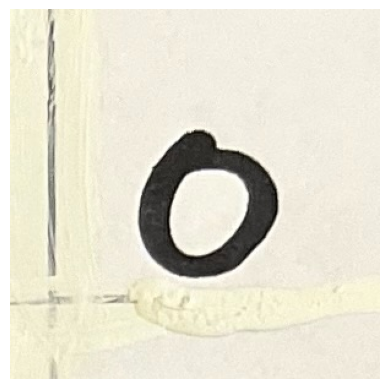

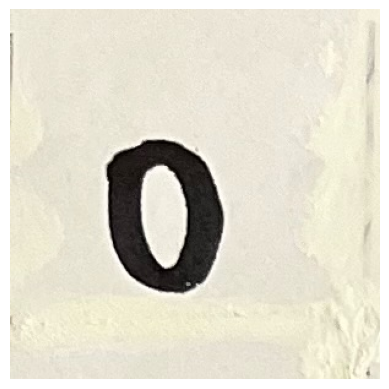

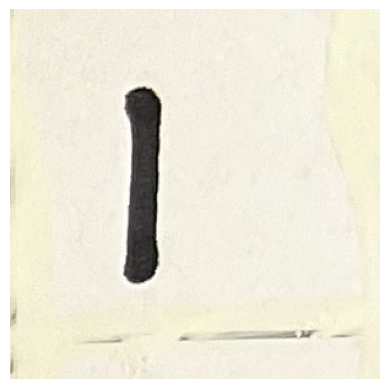

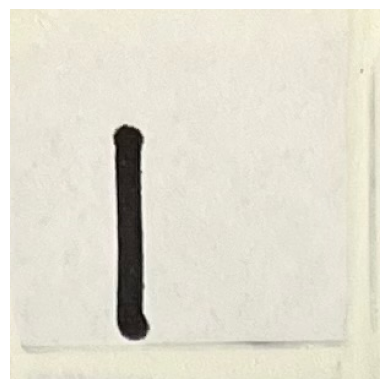

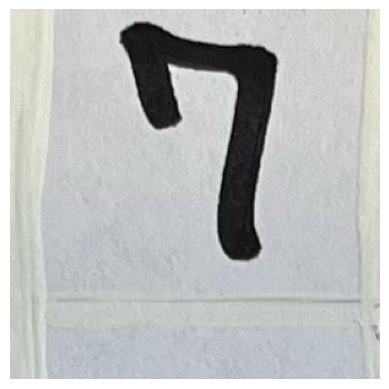

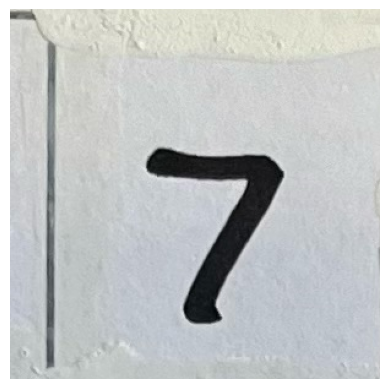

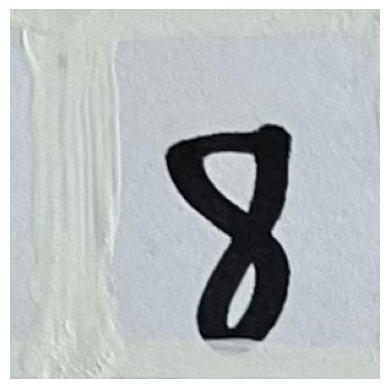

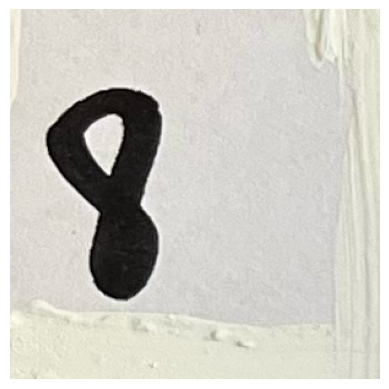

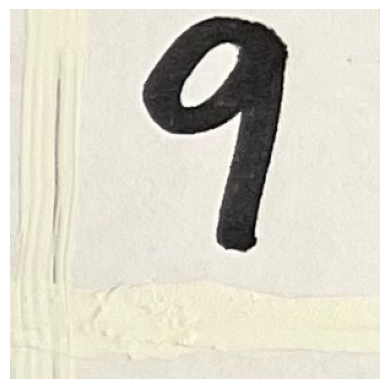

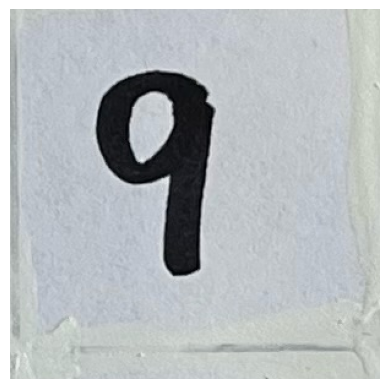

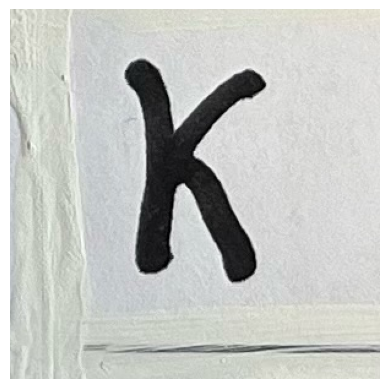

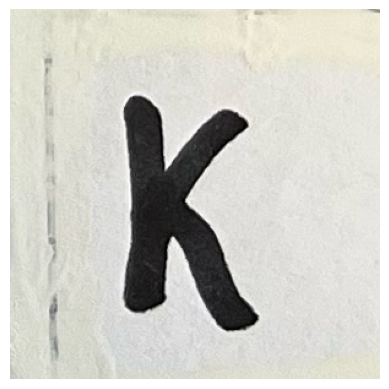

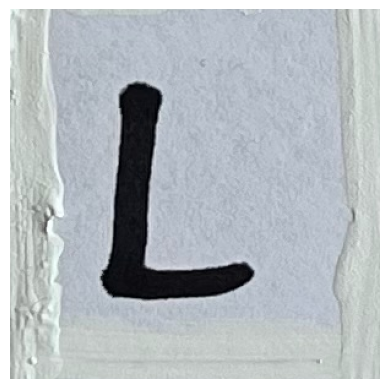

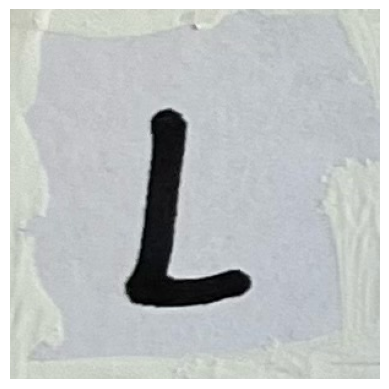

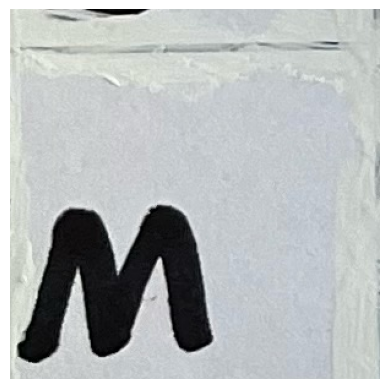

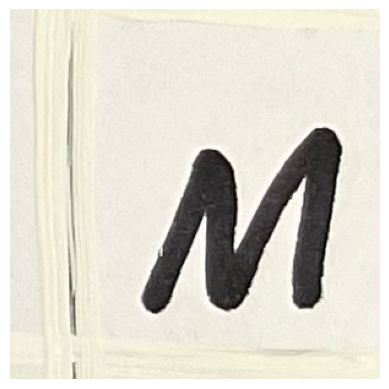

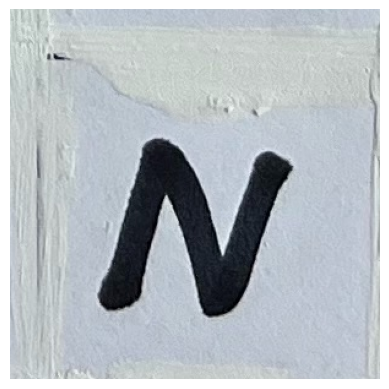

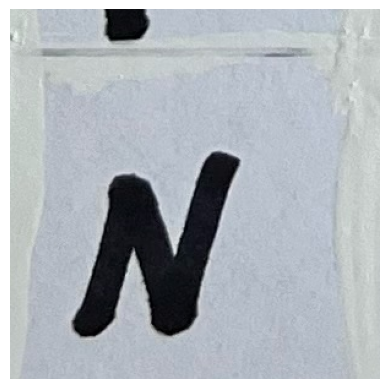

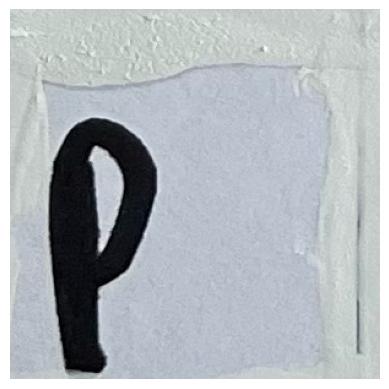

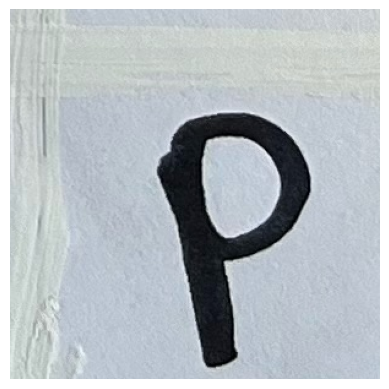

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_zero = [os.path.join(zero_dir, fname)
                for fname in zero_files[pic_index-2:pic_index]]
next_one = [os.path.join(one_dir, fname)
                for fname in one_files[pic_index-2:pic_index]]
next_seven = [os.path.join(seven_dir, fname)
                for fname in seven_files[pic_index-2:pic_index]]
next_eight = [os.path.join(eight_dir, fname)
                for fname in eight_files[pic_index-2:pic_index]]
next_nine= [os.path.join(nine_dir, fname)
                for fname in nine_files[pic_index-2:pic_index]]
next_k = [os.path.join(k_dir, fname)
                for fname in k_files[pic_index-2:pic_index]]
next_l = [os.path.join(l_dir, fname)
                for fname in l_files[pic_index-2:pic_index]]
next_m = [os.path.join(m_dir, fname)
                for fname in m_files[pic_index-2:pic_index]]
next_n = [os.path.join(n_dir, fname)
                for fname in n_files[pic_index-2:pic_index]]
next_p = [os.path.join(p_dir, fname)
                for fname in p_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_zero+next_one+next_seven+next_eight+next_nine+next_k+next_l+next_m+next_n+next_p):

  #print(img_path)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



# Model Creation and training

## Downloading Keras_preprocessing

In [ ]:
!pip install -q keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


# Model creation and training

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR =  "/content/ndnmol/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/ndnmol_test_set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=40 #changed batch size
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=40 #Changed batch size
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #PS: updated to 10 from 3 because we have 10 clsses and not 3
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)

model.save("clf5")


Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                      

In [ ]:

os.mkdir("cfdata")
for folder in os.listdir(VALIDATION_DIR):
  random_files = random.sample(os.listdir(f"{VALIDATION_DIR}{folder}"),10)
  os.mkdir(f"/content/cfdata/{folder}")
  for filename in random_files:
    shutil.copy(f"{VALIDATION_DIR}{folder}/{filename}",f"/content/cfdata/{folder}/{filename}")



In [ ]:
import numpy as np

pred_number = {
    '0' : 0,
    '1' : 1,
    "7" : 2,
    "8" : 3,
    "9" : 4,
    "k" : 5,
    "l" : 6,
    "m" : 7,
    "n" : 8,
    "p" : 9,
}

y_pred = [None]*100
y_true = [None]*100
i=0
for folder in os.listdir("/content/cfdata/"):
  for filename in os.listdir(f"/content/cfdata/{folder}"):
    img = image.load_img(f"/content/cfdata/{folder}/{filename}", target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_pred[i] = model.predict(images,verbose="False")
    y_true[i] = pred_number.get(folder)
    i += 1

In [ ]:

y_pred_class = [None] * 100
i = 0
for pred in y_pred:
  [pred_proba] = y_pred[i]
  print(pred_proba)
  print(f"i: {i}  max element at {np.argmax(pred_proba)}")
  y_pred_class[i] = np.argmax(pred_proba)
  i += 1

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 0  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 1  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 2  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 3  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 4  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 5  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 6  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 7  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 8  max element at 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i: 9  max element at 6
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 10  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 11  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 12  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 13  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 14  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 15  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 16  max element at 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i: 17  max element at 1
[0

In [ ]:
print(y_pred_class[94:])
print(y_true[94:])
print(len(y_pred_class),len(y_true))

[2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2]
100 100


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ["0","1","7","8","9","k","l","m","n","p"]
cfm = tf.math.confusion_matrix(y_true,y_pred_class)

sns.heatmap(cfm, annot=True, cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model results

## Model training accuracy vs validation accuracy with epochs

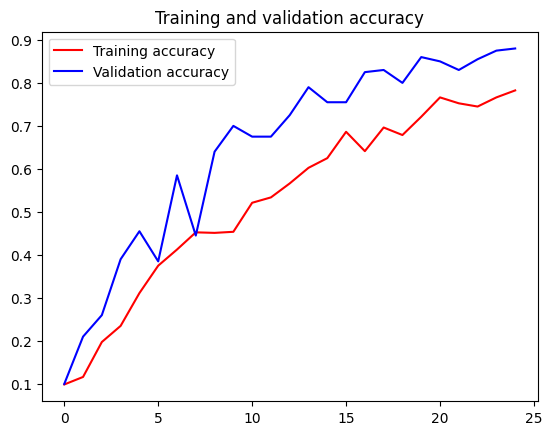

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


# Model Prediction

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

KeyboardInterrupt: ignored

#What we learned with this project

This machine learning project centered around extending the MNIST dataset to incorporate both numerical digits and uppercase letters. The objective was to create a comprehensive dataset for training a multiclass image classifier. This project involved various phases, from data generation to model development and evaluation.

Data Collection:
The first step involved creating a dataset of perfect squares containing numbers and uppercase letters. We used Python and the ReportLab library to generate a PDF file with a 10x10 grid of squares, each labeled with a unique character, which reneged between 0, 1, 7, 8, 9, K, L, M, N, P. After printing and preparing the sheets, we took pictures using our smartphones, ensuring they were perfect square images and used wite out over the square lines.

Data Preprocessing:
We then wrote a Python program to divide the images into individual 10x10 squares, naming each square sequentially. These squares were later zipped together into output files for further processing.

Data Organization:
To prepare for model training, we used a python program to organize the data into ten different folders, naming them after the characters they represented and then we manually separated them between the training and testing folder, the training folder with 80 data files and the testing folder with 20 data files.

Model Training:
Following the guidance provided in the project description, we utilized TensorFlow to develop a multiclass image classifier. We adapted concepts from a Colab notebook and a YouTube tutorial that used 3 classes, modifying them to suit our 10 classes classification task. We learned about the importance of configuring hyperparameters, defining the model architecture, and compiling the model.

Model Evaluation:
During training, we monitored the model's training and validation accuracy, ensuring that it generalized well to the test data. This step allowed us to assess the model's performance and identify potential overfitting issues.

Integration of ChatGPT:
In the pursuit of success in this project, we also used ChatGPT, which served as a knowledgeable tool, offering guidance and insights on various aspects of the project. It helped us to understand complex machine learning concepts, provided assistance in debugging the code when we encountered challenges, and for necessary suggestions for adjustments to our codebase for our 10 classes. This collaborative effort with ChatGPT optimized our workflow, enabling us to address the project more effectively and make better decisions. As a result, our project benefited from both human and AI input, cultivating a rich learning experience and a more strong final outcome.


This project has been a valuable learning experience and enriched our understanding of machine learning applications. It offered practical insights into the data collection and preprocessing phases, as well as hands-on experience in developing a deep learning model for multiclass classification. Additionally, we improved our skills in organizing data and evaluating model performance and helped us to improve our utilization of ChatGPT to our advantage and to optimize our time throughout the project. Overall, this project provided a hands-on opportunity to apply machine learning concepts to a real-world problem, which contributes to our comprehension of these principles.

